In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
X = df.drop('sales' , axis = 1)
y = df['sales']

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly_conv = PolynomialFeatures(degree = 2 , include_bias = False)

In [6]:
poly_conv.fit(X) # X_poly = poly_conv.fit_transform(X)

PolynomialFeatures(include_bias=False)

In [7]:
X_poly = poly_conv.transform(X)

In [8]:
X_poly

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X_poly , y , test_size = 0.2 , random_state = 53)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train , y_train)

LinearRegression()

In [14]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [15]:
y_pred = lr.predict(X_test)

In [16]:
# lr.coef_

In [17]:
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
rmse = mse ** 0.5

In [18]:
mae

0.5379068509935304

In [19]:
rmse

0.746853944838509

In [20]:
# MAE : 1.1908337679867462 , RMSE : 1.4239860993536244 without polynomial features.

In [21]:
X_poly[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [22]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [23]:
# Which degree is the best for PolynomialRegression

In [24]:
train_rmse_list = []
test_rmse_list = []

In [25]:
for d in range(1,10):
    poly_conv = PolynomialFeatures(degree = d , include_bias = False)
    
    X_poly = poly_conv.fit_transform(X)
    
    X_train , X_test , y_train , y_test = train_test_split(X_poly , y , test_size = 0.2 , random_state=53)
    
    lr = LinearRegression()
    lr.fit(X_train , y_train)
    
    y_train_pred = lr.predict(X_train)
    y_pred = lr.predict(X_test)
    
    train_rmse = mean_squared_error(y_train , y_train_pred) ** 0.5
    test_rmse = mean_squared_error(y_test,y_pred) ** 0.5
    
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)


In [26]:
train_rmse_list

[1.7249159673545789,
 0.5781718985573561,
 0.42122233918472124,
 0.32259273118123205,
 0.23649338657974006,
 0.22615648224063273,
 0.18398559244112997,
 0.13914760658034225,
 0.16616679277419402]

In [27]:
test_rmse_list

[1.4239860993536246,
 0.746853944838509,
 0.7236149434552842,
 0.7054703650834173,
 0.542941938814387,
 0.6499712680472394,
 1.4139764593025648,
 7.567915425461895,
 67.62352791629621]

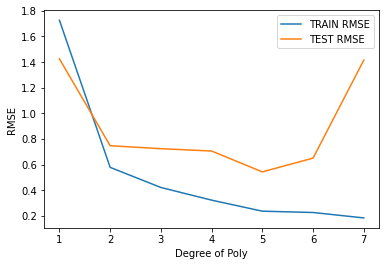

In [28]:
plt.plot(range(1,8) , train_rmse_list[:7] , label = 'TRAIN RMSE')
plt.plot(range(1,8) , test_rmse_list[:7] , label = 'TEST RMSE')

plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')

plt.legend()

plt.show() # 5 or 4 degree is too risky. 2 or 3 degree is the ideal for this.

In [29]:
final_poly_conv = PolynomialFeatures(degree = 3 , include_bias=False)

In [30]:
final_model = LinearRegression()

In [31]:
X_conv = final_poly_conv.fit_transform(X)
final_model.fit(X_conv , y) 

LinearRegression()

In [32]:
from joblib import dump,load

In [33]:
dump(final_model,'dumps\Final_Poly_Model.joblib')

['dumps\\Final2_Poly_Model.joblib']

In [34]:
dump(final_poly_conv,'Final_Converter.joblib')

['Final_Converter.joblib']

In [35]:
# We finished dumping.

In [36]:
loaded_converter = load('Final_Converter.joblib')
loaded_model = load('Final_Poly_Model.joblib')

In [37]:
new_data = [[149,22,12]]

In [38]:
transformed_data = loaded_converter.fit_transform(new_data)

In [39]:
loaded_model.predict(transformed_data)

array([14.64501014])

In [40]:
# Done